In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

%matplotlib inline

In [31]:
data = pd.read_csv('data.csv', index_col= 0)

In [32]:
data.head()

,acousticness_avg,acousticness_std,danceability_avg,danceability_std,duration_ms_avg,duration_ms_std,energy_avg,energy_std,followers,instrumentalness_avg,...,song_popularity_avg,song_popularity_std,speechiness_avg,speechiness_std,tempo_avg,tempo_std,time_signature_avg,time_signature_std,valence_avg,valence_std
0,0.194584,0.171983,0.655940,0.113601,203916.7400,20848.451678,0.655220,0.140195,1403307,0.000076,...,80.5000,12.147839,0.081500,0.067375,111.175180,25.315509,4.0000,0.200000,0.422914,0.165588
1,0.236093,0.212474,0.641660,0.114543,217370.1500,50370.220381,0.705670,0.175782,2406903,0.010640,...,61.8900,15.681770,0.054565,0.039034,117.533380,21.954430,4.0000,0.000000,0.751000,0.199712
2,0.185966,0.173107,0.656162,0.114090,214918.4375,34896.851495,0.664425,0.148360,218518,0.004704,...,64.3750,13.414894,0.046010,0.022244,114.561925,21.994968,3.9875,0.193245,0.617387,0.211768
3,0.132846,0.117976,0.730612,0.081441,209974.0000,28768.262698,0.758163,0.113106,169453,0.003579,...,78.2875,11.201779,0.085573,0.053110,118.060038,29.990054,4.0000,0.000000,0.606237,0.201211
4,0.032074,0.083080,0.487220,0.126472,206852.6000,31874.021837,0.803940,0.123784,473852,0.030798,...,55.6000,15.390906,0.071556,0.047209,127.606140,29.084261,3.9200,0.440000,0.557880,0.193230


In [33]:
data.columns

Index(['acousticness_avg', 'acousticness_std', 'danceability_avg',
       'danceability_std', 'duration_ms_avg', 'duration_ms_std', 'energy_avg',
       'energy_std', 'followers', 'instrumentalness_avg',
       'instrumentalness_std', 'is_public', 'key_avg', 'key_std',
       'liveness_avg', 'liveness_std', 'loudness_avg', 'loudness_std',
       'mode_avg', 'mode_std', 'no_of_songs', 'num_of_artists',
       'num_of_markets_avg', 'song_duration_avg', 'song_duration_std',
       'song_popularity_avg', 'song_popularity_std', 'speechiness_avg',
       'speechiness_std', 'tempo_avg', 'tempo_std', 'time_signature_avg',
       'time_signature_std', 'valence_avg', 'valence_std'],
      dtype='object')

In [34]:
data.shape

(2044, 35)

In [35]:
data.dropna(how='any', inplace= True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2043
Data columns (total 35 columns):
acousticness_avg        2043 non-null float64
acousticness_std        2043 non-null float64
danceability_avg        2043 non-null float64
danceability_std        2043 non-null float64
duration_ms_avg         2043 non-null float64
duration_ms_std         2043 non-null float64
energy_avg              2043 non-null float64
energy_std              2043 non-null float64
followers               2043 non-null int64
instrumentalness_avg    2043 non-null float64
instrumentalness_std    2043 non-null float64
is_public               2043 non-null int64
key_avg                 2043 non-null float64
key_std                 2043 non-null float64
liveness_avg            2043 non-null float64
liveness_std            2043 non-null float64
loudness_avg            2043 non-null float64
loudness_std            2043 non-null float64
mode_avg                2043 non-null float64
mode_std               

In [37]:
#scaler = MinMaxScaler().fit(data)

#data1 = scaler.transform(data)

#data1 = pd.DataFrame(data1, columns= data.columns)

data1 = data.copy()

In [38]:
data1.head()

,acousticness_avg,acousticness_std,danceability_avg,danceability_std,duration_ms_avg,duration_ms_std,energy_avg,energy_std,followers,instrumentalness_avg,...,song_popularity_avg,song_popularity_std,speechiness_avg,speechiness_std,tempo_avg,tempo_std,time_signature_avg,time_signature_std,valence_avg,valence_std
0,0.194584,0.171983,0.655940,0.113601,203916.7400,20848.451678,0.655220,0.140195,1403307,0.000076,...,80.5000,12.147839,0.081500,0.067375,111.175180,25.315509,4.0000,0.200000,0.422914,0.165588
1,0.236093,0.212474,0.641660,0.114543,217370.1500,50370.220381,0.705670,0.175782,2406903,0.010640,...,61.8900,15.681770,0.054565,0.039034,117.533380,21.954430,4.0000,0.000000,0.751000,0.199712
2,0.185966,0.173107,0.656162,0.114090,214918.4375,34896.851495,0.664425,0.148360,218518,0.004704,...,64.3750,13.414894,0.046010,0.022244,114.561925,21.994968,3.9875,0.193245,0.617387,0.211768
3,0.132846,0.117976,0.730612,0.081441,209974.0000,28768.262698,0.758163,0.113106,169453,0.003579,...,78.2875,11.201779,0.085573,0.053110,118.060038,29.990054,4.0000,0.000000,0.606237,0.201211
4,0.032074,0.083080,0.487220,0.126472,206852.6000,31874.021837,0.803940,0.123784,473852,0.030798,...,55.6000,15.390906,0.071556,0.047209,127.606140,29.084261,3.9200,0.440000,0.557880,0.193230


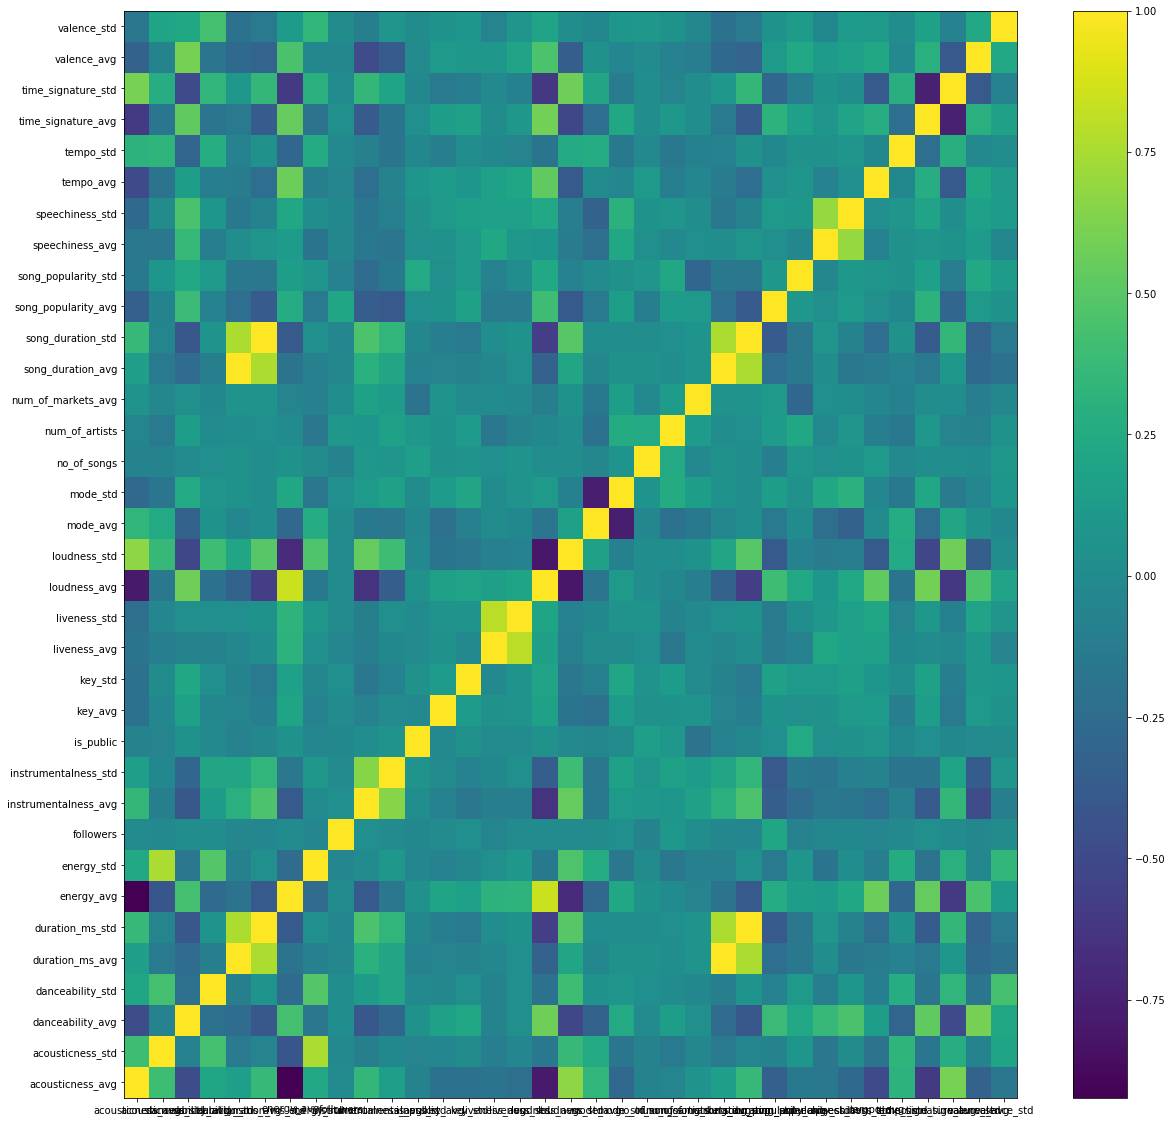

In [39]:
data2 = data1.corr()
plt.figure(figsize= (20,20))
plt.pcolor(data2)
plt.yticks(np.arange(0.5, len(data2.index), 1), data2.index)
plt.xticks(np.arange(0.5, len(data2.columns), 1), data2.columns)
plt.colorbar()

In [40]:
print('correlation of num of followers with other variables: ', data2['followers'])

correlation of num of followers with other variables:  acousticness_avg       -0.014110
acousticness_std       -0.015744
danceability_avg        0.020093
danceability_std        0.015288
duration_ms_avg        -0.032318
duration_ms_std        -0.037395
energy_avg             -0.005703
energy_std             -0.041394
followers               1.000000
instrumentalness_avg    0.026129
instrumentalness_std   -0.008571
is_public              -0.029503
key_avg                -0.009474
key_std                 0.024899
liveness_avg           -0.048286
liveness_std           -0.013935
loudness_avg           -0.000822
loudness_std           -0.009443
mode_avg                0.002988
mode_std                0.023697
no_of_songs            -0.060895
num_of_artists          0.096386
num_of_markets_avg      0.016582
song_duration_avg      -0.032328
song_duration_std      -0.037526
song_popularity_avg     0.217564
song_popularity_std    -0.069118
speechiness_avg        -0.034887
speechiness_std      

We can see that the correlation of the number of followers is very low with all other variables

In [41]:
data3 = data1.copy()

In [42]:
data3['followers'] = np.log2(data3['followers'])

In [43]:
print('correlation of log of followers with other variables: \n', data3.corr()['followers'])

correlation of log of followers with other variables: 
 acousticness_avg       -0.071257
acousticness_std       -0.038489
danceability_avg        0.001092
danceability_std        0.003287
duration_ms_avg        -0.001585
duration_ms_std        -0.031310
energy_avg              0.065630
energy_std             -0.083398
followers               1.000000
instrumentalness_avg    0.039748
instrumentalness_std    0.026376
is_public              -0.274205
key_avg                 0.007341
key_std                 0.039360
liveness_avg           -0.047241
liveness_std           -0.020115
loudness_avg            0.035245
loudness_std           -0.060209
mode_avg               -0.071120
mode_std                0.101717
no_of_songs            -0.142433
num_of_artists          0.113254
num_of_markets_avg      0.093902
song_duration_avg      -0.001601
song_duration_std      -0.031016
song_popularity_avg     0.211187
song_popularity_std    -0.128803
speechiness_avg        -0.042598
speechiness_std     

In [58]:
y = (data1['followers'])

X = data1.drop(['followers'], axis = 1)

In [59]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     6.030
Date:                Sun, 03 Dec 2017   Prob (F-statistic):           8.22e-25
Time:                        23:40:54   Log-Likelihood:                -28419.
No. Observations:                2043   AIC:                         5.691e+04
Df Residuals:                    2008   BIC:                         5.710e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.573e+05   4.06e+05     -2.114      0.035   -1.65e+06   -6.18e+04
acousticness_avg      8.085e+04   8.89e+04      0.909      0.363   -9.36e+04    2.55e+05
acousticness_std      1.515e+05   1.42e+05      1.065      0.287   -1.27e+05     4.3e+05
danceability_avg      7161.7792   1.31e+05      0.055      0.956   -2.49e+05    2.64e+05
danceability_std      3.075e+05   3.14e+05      0.980      0.327   -3.08e+05    9.23e+05
duration_ms_avg         10.2485     13.282      0.772      0.440     -15.799      36.296
duration_ms_std          3.7668      7.266      0.518      0.604     -10.483      18.016
energy_avg            1.643e+05   1.62e+05      1.017      0.309   -1.53e+05    4.81e+05
energy_std           -4.153e+05   2.81e+05     -1.479      0.139   -9.66e+05    1.35e+05
instrumentalness_avg  1.416e+05   5.71e+04      2.479      0.013    2.96e+04    2.54e+05
instrumentalness_std  4.538e+04   7.79e+04      0.583      0.560   -1.07e+05    1.98e+05
is_public            -1.819e+04   1.44e+04     -1.261      0.207   -4.65e+04    1.01e+04
key_avg                744.2960   9899.508      0.075      0.940   -1.87e+04    2.02e+04
key_std              -5659.5440   2.14e+04     -0.264      0.792   -4.77e+04    3.64e+04
liveness_avg         -3.806e+05   1.95e+05     -1.956      0.051   -7.62e+05     954.821
liveness_std          5.737e+05   2.11e+05      2.720      0.007     1.6e+05    9.87e+05
loudness_avg         -2025.9964   5733.843     -0.353      0.724   -1.33e+04    9218.908
loudness_std          7260.5060   1.17e+04      0.620      0.535   -1.57e+04    3.02e+04
mode_avg              1.447e+05   6.88e+04      2.102      0.036    9673.073     2.8e+05
mode_std               6.77e+04   1.34e+05      0.507      0.612   -1.94e+05     3.3e+05
no_of_songs            -65.3979     26.424     -2.475      0.013    -117.219     -13.577
num_of_artists         786.2935    187.082      4.203      0.000     419.397    1153.189
num_of_markets_avg   -1695.0592    485.324     -3.493      0.000   -2646.850    -743.269
song_duration_avg      -10.3430     13.289     -0.778      0.436     -36.404      15.718
song_duration_std       -3.7636      7.253     -0.519      0.604     -17.988      10.461
song_popularity_avg   5330.2962    532.506     10.010      0.000    4285.974    6374.618
song_popularity_std  -6312.4021   1392.151     -4.534      0.000   -9042.614   -3582.191
speechiness_avg       1.065e+05   1.45e+05      0.736      0.462   -1.77e+05     3.9e+05
speechiness_std      -3.248e+05   2.48e+05     -1.309      0.191   -8.11e+05    1.62e+05
tempo_avg               12.7515    882.048      0.014      0.988   -1717.074    1742.577
tempo_std             -276.0361   1208.885     -0.228      0.819   -2646.836    2094.764
time_signature_avg     1.46e+05   8.21e+04      1.778    

*** The R-square value is very low. So next we try with the log of the number of followers ***

In [63]:
y2 = (data3['followers'])

X2 = data3.drop(['followers'], axis = 1)

In [64]:
X2.shape, y2.shape

((2043, 34), (2043,))

In [65]:
X2 = sm.add_constant(X2)
model = sm.OLS(y2,X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              followers   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 03 Dec 2017   Prob (F-statistic):           3.47e-80
Time:                        23:41:15   Log-Likelihood:                -5070.9
No. Observations:                2043   AIC:                         1.021e+04
Df Residuals:                    2008   BIC:                         1.041e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.0692      4.414     -1.375      0.169     -14.726       2.588
acousticness_avg         2.8607      0.968      2.955      0.003       0.962       4.759
acousticness_std         4.8468      1.547      3.132      0.002       1.812       7.881
danceability_avg         1.7853      1.424      1.254      0.210      -1.006       4.577
danceability_std         5.2791      3.416      1.545      0.122      -1.420      11.978
duration_ms_avg       6.258e-05      0.000      0.433      0.665      -0.000       0.000
duration_ms_std       1.516e-06   7.91e-05      0.019      0.985      -0.000       0.000
energy_avg               9.1307      1.759      5.190      0.000       5.681      12.581
energy_std              -6.2808      3.055     -2.056      0.040     -12.272      -0.290
instrumentalness_avg     1.2137      0.622      1.952      0.051      -0.006       2.433
instrumentalness_std     1.1086      0.848      1.308      0.191      -0.554       2.771
is_public               -1.9857      0.157    -12.650      0.000      -2.294      -1.678
key_avg                 -0.0632      0.108     -0.587      0.557      -0.275       0.148
key_std                  0.0428      0.233      0.184      0.854      -0.415       0.500
liveness_avg            -7.0775      2.118     -3.342      0.001     -11.230      -2.925
liveness_std             6.2579      2.295      2.727      0.006       1.757      10.759
loudness_avg            -0.1545      0.062     -2.475      0.013      -0.277      -0.032
loudness_std            -0.0921      0.127     -0.723      0.470      -0.342       0.158
mode_avg                 1.3427      0.749      1.793      0.073      -0.126       2.812
mode_std                 2.2939      1.454      1.578      0.115      -0.557       5.145
no_of_songs             -0.0016      0.000     -5.497      0.000      -0.002      -0.001
num_of_artists           0.0126      0.002      6.208      0.000       0.009       0.017
num_of_markets_avg      -0.0174      0.005     -3.301      0.001      -0.028      -0.007
song_duration_avg    -6.489e-05      0.000     -0.449      0.654      -0.000       0.000
song_duration_std     3.722e-07   7.89e-05      0.005      0.996      -0.000       0.000
song_popularity_avg      0.0546      0.006      9.415      0.000       0.043       0.066
song_popularity_std     -0.0695      0.015     -4.589      0.000      -0.099      -0.040
speechiness_avg          2.1056      1.575      1.337      0.181      -0.983       5.194
speechiness_std         -8.3858      2.700     -3.106      0.002     -13.680      -3.092
tempo_avg                0.0076      0.010      0.792      0.428      -0.011       0.026
tempo_std                0.0050      0.013      0.381      0.703      -0.021       0.031
time_signature_avg       2.7035      0.894      3.025    

In [20]:
relevant = results.pvalues[results.pvalues < 0.005]

relevant

acousticness_avg       3.160187e-03
acousticness_std       1.758250e-03
energy_avg             2.313350e-07
is_public              2.403950e-35
liveness_avg           8.460709e-04
no_of_songs            4.366463e-08
num_of_artists         6.518359e-10
num_of_markets_avg     9.815253e-04
song_popularity_avg    1.244719e-20
song_popularity_std    4.731874e-06
speechiness_std        1.920530e-03
time_signature_avg     2.517768e-03
time_signature_std     1.737323e-03
valence_avg            1.431939e-03
dtype: float64

In [22]:
len(relevant)

14

# The variables seen here with P< 0.5 are the relevant variables. Even though the R square value is still in the range of 0.21 it is much better than the case where a log value of the number of followers was not considered

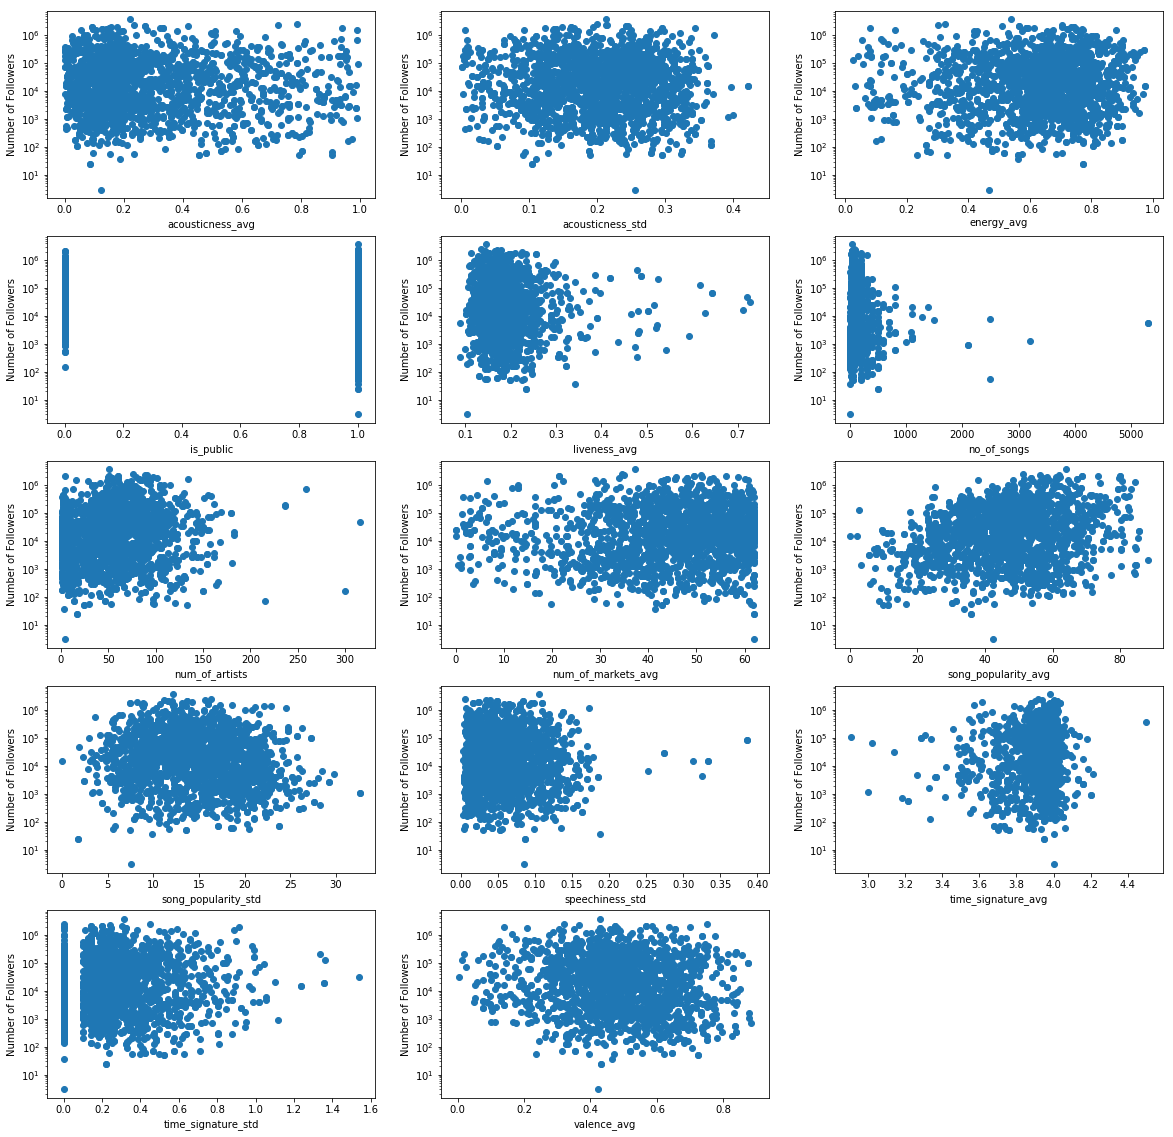

In [29]:
plt.figure(figsize=(20,20))

i=1

for r in relevant.index:
    
    plt.subplot(5,3,i)
    plt.scatter(data1[r], data1['followers'])
    plt.yscale('log')
    plt.xlabel(r)
    plt.ylabel('Number of Followers')
        
    i += 1
    
    
    
    